# Simple NMP


In [1]:
# import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.integrate import odeint

# Plotting
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
%matplotlib inline

# Control system library
import control

## Transfer function

Simple transfer function
$$
\frac{-s+2}{s^2+3s+1}
$$


   -s + 2
-------------
s^2 + 3 s + 1



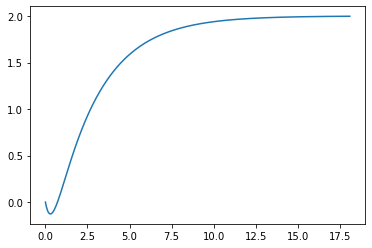

In [3]:
# numerator
num = np.array([-1, 2])
den = np.array([1, 3, 1])

# transfer function
H = control.tf(num, den)
print(H)

# step response:
t, y = control.step_response(H)
plt.plot(t, y)

Poles: [-2.61803399 -0.38196601]


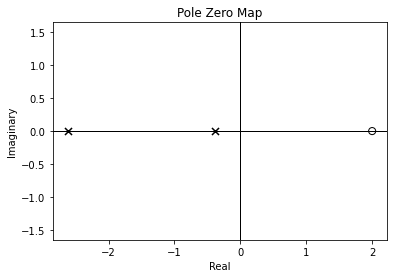

In [13]:
# Generating the pole zero map
control.pzmap(H)

# Poles:
p = control.pole(H)
z = control.zero(H)

print(f"Poles: {p}")

In [4]:
# Checking the input output:
io = control.tf2io(H)
print(io)

System: sys[0]
Inputs (1): u[0], 
Outputs (1): y[0], 
States (2): x[0], x[1], 


In [6]:
# Check the state space
st_space = control.tf2ss(H)
print(st_space)

A = [[-3. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-1.  2.]]

D = [[0.]]




      1
-------------
s^2 + 3 s + 1

[0.         0.00131919 0.00501263 0.01072348 0.01814189 0.026999
 0.03706154 0.0481273  0.06002105 0.07259109 0.08570617 0.09925283
 0.11313311 0.12726251 0.14156827 0.15598782 0.17046743 0.18496111
 0.19942952 0.21383919 0.22816165 0.24237285 0.25645254 0.27038375
 0.28415241 0.2977469  0.31115775 0.32437736 0.33739972 0.35022021
 0.36283541 0.37524292 0.38744124 0.39942961 0.41120793 0.42277665
 0.4341367  0.4452894  0.45623642 0.46697971 0.47752146 0.48786405
 0.49801003 0.50796209 0.51772302 0.52729568 0.53668301 0.54588799
 0.55491365 0.563763   0.5724391  0.58094499 0.5892837  0.59745827
 0.60547168 0.61332692 0.62102693 0.62857464 0.63597291 0.6432246
 0.6503325  0.65729939 0.66412798 0.67082095 0.67738094 0.68381054
 0.69011229 0.69628871 0.70234225 0.70827533 0.71409031 0.71978953
 0.72537528 0.73084979 0.73621527 0.74147387 0.74662771 0.75167888
 0.7566294  0.76148128 0.76623648 0.77089691 0.77546446 0.77994097
 0.78432826 0.78862811 0.79

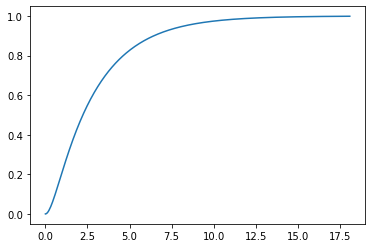

In [12]:
# numerator
num = np.array([1])
den = np.array([1, 3, 1])

# transfer function
H2 = control.tf(num, den)
print(H2)

# step response:
t, y = control.step_response(H2)
plt.plot(t, y)

print(y)
